---
bibliography:
  - bibliography.bib
---

# Forecasting

## Autoregressive Models

### Definition [^ar-definition]

Autoregressive models are based on the idea that the current value of the series can be explained by a linear combination of the $p$ previous values. To be more precise

:::{prf:definition} Autoregressive Model $AR(p)$
The autoregressive model of order $p$ is a [discrete stochastic process](Time-Series-Mathematical-Models.ipynb) that satisfies

$$
X_n = a_1 X_{n-1} + a_2 X_{n-2} + \cdots + a_p X_{n-p} + W_n
$$

where $a_1, a_2, \ldots, a_p$ are the model parameters and $W_1, W_2, \ldots$ is a white noise process with variance $\sigma^2$.

For a given autoregressive process, the **characteristic polynomial** is defined as

$$
\Phi(x) = 1 - a_1 x - a_2 x^2 - \cdots - a_p x^p .
$$
:::

Autoregressive models are exclusively used for the modeling of stationary processes. However, the above definition does not guarantee stationarity. There may be combinations of model parameters that lead to non-stationary processes. We will give a sufficient condition on the parameters that render the process stationary further below. For the time being we study an important special case: the $AR(1)$ process.

:::{prf:definition} $AR(1)$

The AR(1) process is defined by

$$
X_n = a_1 X_{n-1} + W_n.
$$
:::

That means that the random walk is a special case of an AR(1) with $a_1 = 1$ (see Example 13.1.1).

### Stationarity [^ar-stationarity]

:::{prf:definition} Stationarity of $AR(p)$

An $AR(p)$ stochastic process is weakly stationary, if all (complex) roots of the characteristic polynomial

$$
\Phi(x) = 1 - a_1 x - a_2 x^2 - \cdots - a_p x^p
$$

exceed 1 in absolute value.
:::

### Partial Autocorellation [^ar-partial-autocorrelation]

:::{prf:definition} Partial Autocorellation
For a weakly stationary stochastic process ${X_1, X_2, \ldots}$ the partial autocorrelation is defined as

$$
\pi(h) = \mathrm{Cor}\big[X_k, X_{k+h} \mid X_{k+1}, \ldots, X_{k+h-1}\big].
$$

*The quantity $\mathrm{Cor}[X, Y \mid Z]$ denotes the conditional correlation of $X$ and $Y$ given the value of $Z$.*
:::

The precise mathematical definition above is somewhat technical and we will not embark further on theoretical aspects, exact computation, etc. We mention, however, that for an autoregressive process AR($p$) the partial autocorrelation has two very important properties:

1. The $p$-th coefficient $a_p$ of an AR($p$) process equals $\pi(p)$, i.e. the partial autocorrelation value at lag $p$ of the process.

2. For an autoregressive process AR($p$) the partial autocorrelation at lags greater than $p$ is zero, i.e. $\pi(k) = 0$ for $k > p$.

With these properties we have a tool at hand to investigate a given autoregressive time series and determine the order of the model: compute the partial autocorrelation and choose the largest lag $k$ for which the value $\pi(k)$ is not zero. In Python the partial autocorrelation of a stationary time series is estimated with the `pacf()` function.

### Forecasting [^ar-forecasting]

Eventually we now aim at forecasting future values of a given autoregressive time series. The general methodology of forecasting stationary time series can be summarized as follows.

:::{prf:definition} $k$-step ahead forecast
Assume that ${X_1, X_2, \ldots}$ is a stationary process and that we have observed a time series ${x_1, x_2, \ldots, x_n}$.
The $k$-step ahead forecast is an estimate of the random variable $X_{n+k}$ given by

$$
\hat X_{n+k} = \mathbb{E}\big[X_{n+k} ,\big|, X_1 = x_1, \ldots, X_n = x_n\big].
$$

Here $\mathbb{E}[X \mid Y = y]$ denotes the conditional expectation of $X$ given that $Y = y$ (cf. Section 3.1).
:::

The above definition requires a model for the time series ${X_1, X_2, \ldots}$ in order to compute the conditional expectation. We will study the computation of this conditional expectation for autoregressive processes and start with a general AR(1).

[^ar-definition]: [@birbaumerPredictiveModelingLecture2025, p. 378]
[^ar-stationarity]: [@birbaumerPredictiveModelingLecture2025, p. 379]
[^ar-partial-autocorrelation]: [@birbaumerPredictiveModelingLecture2025, p. 381]
[^ar-forecasting]: [@birbaumerPredictiveModelingLecture2025, p. 390]

### Forecasting Time series Example 1.10:
In the following we simulate data from an AR(1) process and predict some future values given these data. We build the model on a subset of the generated data, i.e. we cut off some of the values at the end. We will predict these values and study the residuals.

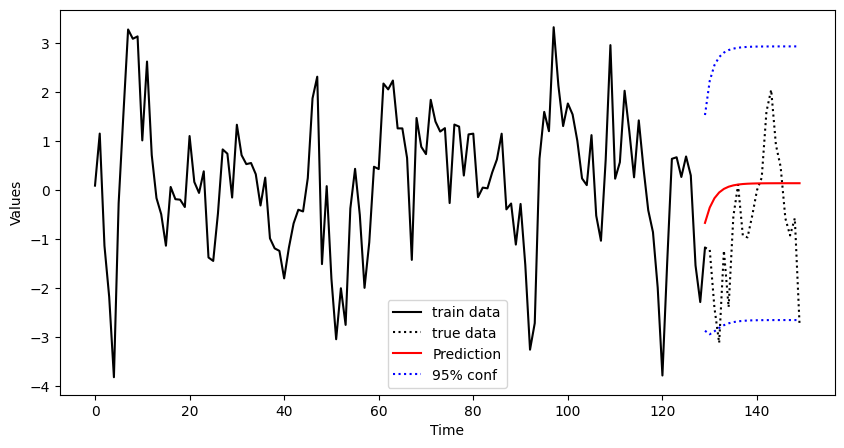

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Simulate AR1 Data
np.random.seed(8)
ar1 = [1, -0.7]

simulated_data = ArmaProcess(ar1)
simulated_data = simulated_data.generate_sample(nsample=150)

# Fit model on first 130 points
model = ARIMA(simulated_data[0:130], order=(1, 0, 0)).fit(method="yule_walker")

# Predict last 20 points
pred = model.get_prediction(start=130, end=150).prediction_results
pred_cov = pred._forecasts_error_cov
pred = pred._forecasts[0]
pred_upper = pred + 1.96 * np.sqrt(pred_cov[0][0])
pred_lower = pred - 1.96 * np.sqrt(pred_cov[0][0])

# Plot
x = np.arange(151)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x[0:130], simulated_data[0:130], '-k', label='train data')
ax.plot(x[129:150], simulated_data[129:150], ':k', label='true data')
ax.plot(x[129:150], pred, 'r', label='Prediction')
ax.plot(x[129:150], pred_upper, ':b', label='95% conf')
ax.plot(x[129:150], pred_lower, ':b')
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.show()


Finally, we add some confidence bands to the plot. To this end, we use the standard error that is stored in `._forecasts_error_cov`. The figure shows the complete data (dotted black) and the training set which consists of the the first 130 observations (solid black). From these data an AR(1) model is built and the values for the remaining 20 observations are predicted (solid red) including confidence limits (dashed red). We see that the true values of the process are within the confidence limits.

### Forecasting Time series Example 1.3
We study the AR(3) process
$$
X_n = 0.5 X_{n-1} - 0.5 X_{n-2} - 0.1 X_{n-3} + W_n
$$
We compute the absolute values of the roots of the characteristic polynomial 
$$\Phi(x) = 1 - 0.5 x + 0.5 x^2 + 0.1 x^3$$
with the following command

In [2]:
import numpy as np

# note order: p[0] * x**n + p[1] * x**(n-1) + ... + p[n-1]*x + p[n]
abs_roots = abs(np.roots([0.1, 0.5, -0.5, 1]))
print(abs_roots)

[6.09052833 1.28136399 1.28136399]


We can see that all the values are larger than $1$ and hence the process is stationary. We can simulate a time series from this model with the `arima_process.ArmaProcess()` method from `statsmodels.tsa`.

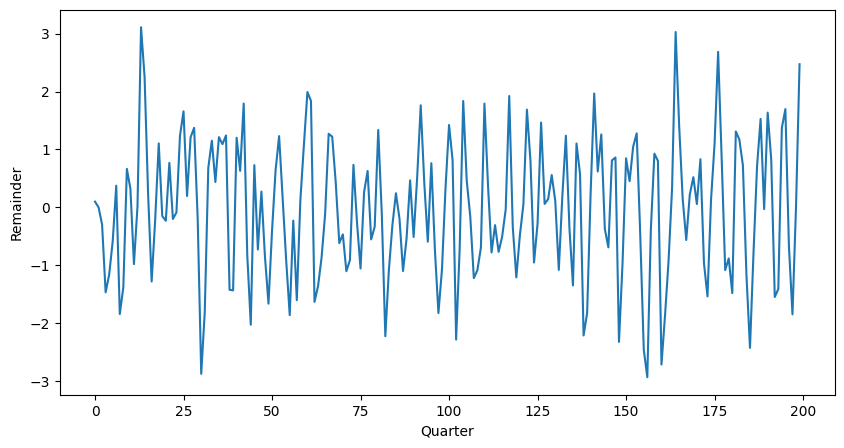

In [3]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess

# Simulate time series using ArmaProcess
ar3 = [1, -0.5, 0.5, 0.1]
simulated_data = ArmaProcess(ar3, ma=[1])
simulated_data = simulated_data.generate_sample(nsample=200)

# plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(simulated_data)
plt.xlabel("Quarter")
plt.ylabel("Remainder")

plt.show()

The figure shows an AR(3) realization of the code above. 

### Forecasting Time series Example 1.5
We study the AR(3) process. The process is defined by the coefficients $a_1 = 0.5$, $a_2= -0.5$ and $a_3 = -0.1$. We use `ArmaProcess()` to simulate the data, and `.acf()` to find the autocorrelation function.

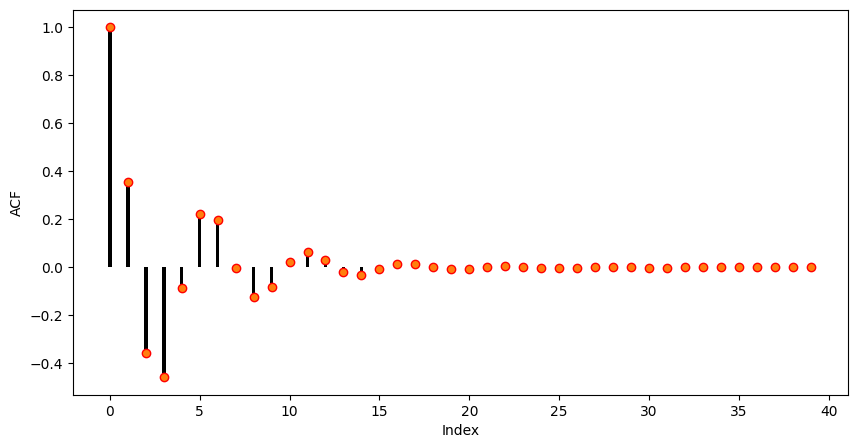

In [4]:
# Compute the theoretical autocorrelation function
lag = 40
acf_theor = ArmaProcess(ar = ar3)
acf_theor = acf_theor.acf(lag)

# Plot
x = np.arange(lag)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
plt.bar(x, acf_theor, width=0.2, color="black")
plt.plot(x, acf_theor, "ro", markerfacecolor="C1")
plt.xlabel("Index")
plt.ylabel("ACF")

plt.show()

As it can be seen the autocorrelation of the given AR(3) is oscillating and decreasing essentially following an exponential function. This is the typical autocorrelation behaviour of an autoregressive process.

### Forecasting Time series Example 1.6
We consider the time series generated from an AR(3) process. 

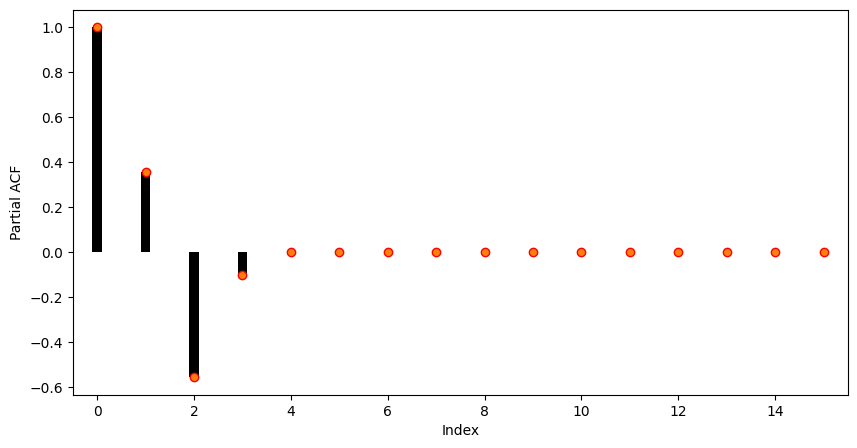

In [5]:
# Compute the partial autocorrelation function
pacf_theor = ArmaProcess(ar=ar3)
pacf_theor = pacf_theor.pacf(lag)

# Plot
x = np.arange(lag)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.bar(x, pacf_theor, width=0.2, color="black")
ax.plot(x, pacf_theor, "ro", markerfacecolor="C1")
ax.set_xlim([-0.5, 15.5])
plt.xlabel("Index")
plt.ylabel("Partial ACF")
plt.show()

As it can be seen, the partial autocorrelation coefficients larger than $3$ are almost zero. So in practice, i.e. when only the time series is at hand, we would 
choose an autoregressive model of order $3$ for modelling the present sequence. 

### Forecasting Time series Example 1.7
Forecasting solar activity is important for satellite drag, telecommunication outages and solar winds in connection with blackout of power plants. As an indicator of solar activity the sunspot number is used, among others. The Swiss astronomer Johann Rudolph Wolf introduced the sunspot number in 1848 and the number of sunspots is now known on a monthly basis back to the year 1749 (from 1749 to 1848 the data is questionable). The data set is built-in in **Python** and the following code produces the plot:

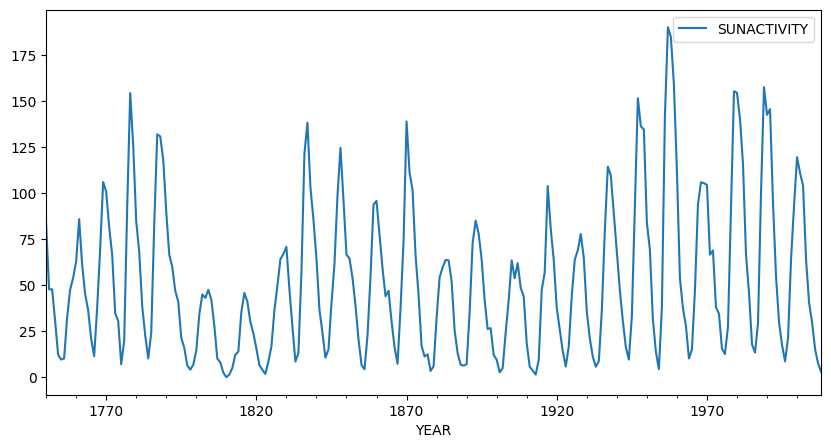

In [6]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

# Load data
dta = sm.datasets.sunspots.load_pandas().data

# Create pandas DateTimeIndex
dtindex = pd.DatetimeIndex(data=pd.to_datetime(dta["YEAR"], format="%Y"), 
                            freq='infer')
# Set as Index
dta.set_index(dtindex, inplace=True)
dta.drop("YEAR", axis=1, inplace=True)
# Select only data after 1750
dta = dta["1750":"2008"]

# Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
dta.plot(ax=ax)
plt.show()

It is important to note that the sunspot data is *not periodic*, i.e. the cycle duration is not constant. So the quasi periodic behaviour must not be mistaken for seasonality. The peaks and minima of the series are not known in advance. 

Eyeballing indicates that the underlying process is not stationary: There are clearly phases with different variances and means. We perform a Box-Cox square-root transform to stabilize the variance.

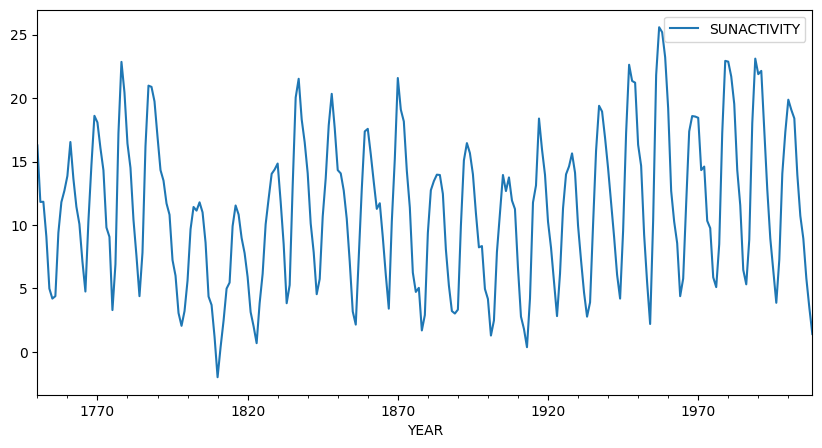

In [7]:
import numpy as np

# Box-Cox square root transformation
dta_sq = (np.sqrt(dta) - 1) * 2

# Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
dta_sq.plot(ax=ax)

plt.show()

The square-root transformed sequence is shown. The variance is visually stabilized and although there is still some trend visible, the series looks fairly stationary after the transformation. Next, we compute the autocorrelation and partial autocorrelation functions in order to clarify whether the autoregressive model is the right choice and in case to determine the proper model order.

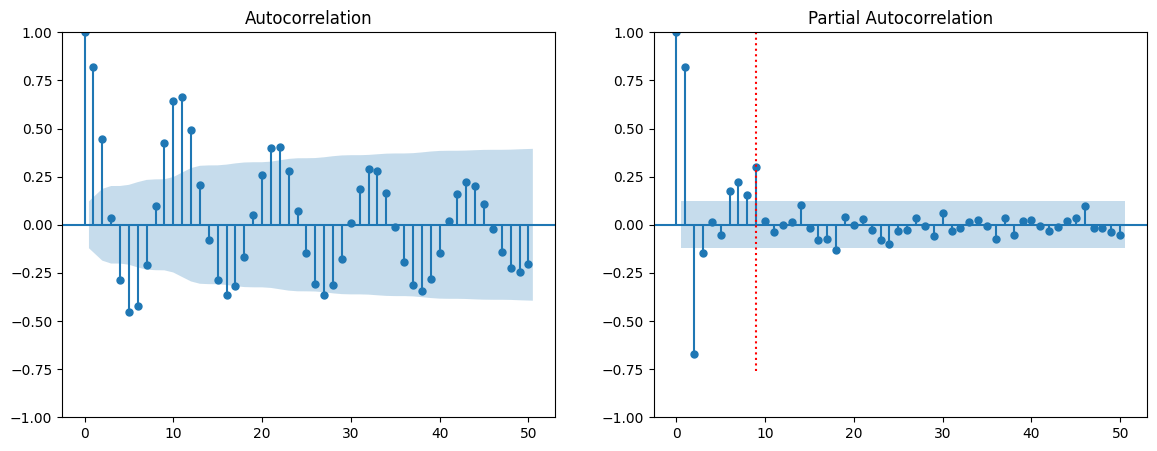

In [8]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

# Plot
fig = plt.figure(figsize=(14, 5))
ax1 = fig.add_subplot(1, 2, 1)
plot_acf(dta_sq, lags=50, ax=ax1)
ax2 = fig.add_subplot(1, 2, 2)
plot_pacf(dta_sq, lags=50, ax=ax2)
ax2.plot([9, 9], [-0.76, 1], ':r')

plt.show()

The autocorrelation (left) and partial autocorrelation (right) are depicted. As it can be seen, the autocorrelation shows the typical behaviour of an autoregressive process: an oscillating pattern with an exponential decay. The partial autocorrelation shows that the direct dependency has a maximum lag of $9$ which we will use as our model parameter $p$ in the next section. The red dotted line marks this threshold.

### Forecasting Time series Example 1.8
We have a look at the sunspot number data set. We have transformed the data by a square-root and have concluded that it stems from an AR(9) model. We will now fit this model to the data

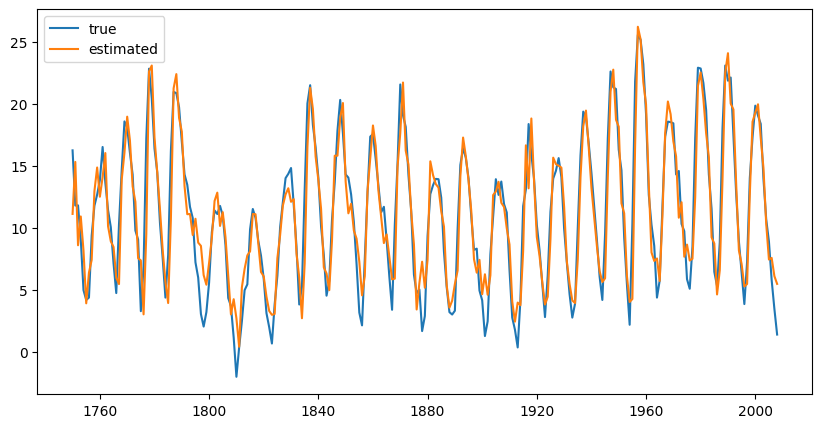

In [9]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(dta_sq, order=(9, 0, 0)).fit(method="yule_walker")

# Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(dta_sq, label='true')
ax.plot(dta_sq["SUNACTIVITY"] - model.resid, label='estimated')
plt.legend()
plt.show()

In [10]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:            SUNACTIVITY   No. Observations:                  259
Model:                 ARIMA(9, 0, 0)   Log Likelihood                -565.246
Date:                Thu, 13 Nov 2025   AIC                           1152.492
Time:                        08:50:50   BIC                           1191.617
Sample:                    01-01-1750   HQIC                          1168.222
                         - 01-01-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1370      1.211      9.200      0.000       8.764      13.510
ar.L1          1.1625      0.062     18.675      0.000       1.040       1.284
ar.L2         -0.4175      0.090     -4.658      0.0

The output above shows the $9$ estimated coefficients and the estimated variance of the white noise process. 

The figure shows the annually averaged time series and the output of the model. The fit seems to be reasonably accurate but we can further assess the result by examining residual plots. We choose a histogram and a qq-plot.

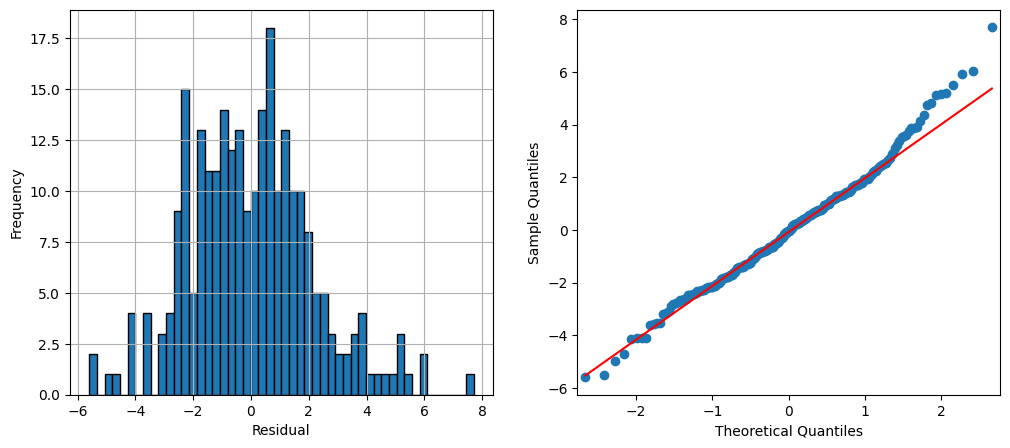

In [11]:
from statsmodels.graphics.api import qqplot

# Plot
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 2, 1)
model.resid.hist(edgecolor="black", bins=50, ax=ax1)
plt.xlabel("Residual")
plt.ylabel("Frequency")
ax2 = fig.add_subplot(1, 2, 2)
qqplot(model.resid, line="q", ax=ax2)

plt.show()

### Forecasting Time series Example 1.11
We again focus on the sunspot number data. We use the annual data from 1749 until 1989 as a training set and estimate an AR(9) model from that data. We then predict the sunspot number for 25 years into the future.  

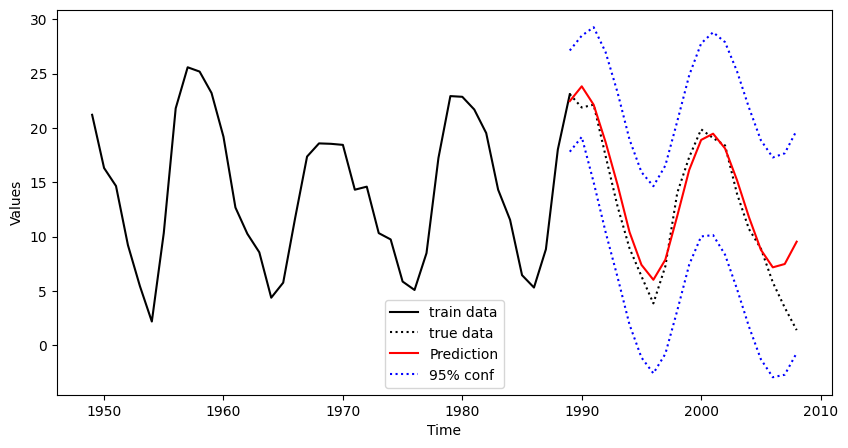

In [12]:
# Fit model on first 130 points
model = ARIMA(dta_sq["1749": "1989"], order=(9, 0, 0)).fit(method="yule_walker")

# Predict including confidence interval
pred = model.get_prediction(start="1989", end="2008").prediction_results
pred_cov = pred._forecasts_error_cov
pred = pred._forecasts[0]
pred_upper = pred + 1.96 * np.sqrt(pred_cov[0][0])
pred_lower = pred - 1.96 * np.sqrt(pred_cov[0][0])

# Plot
x = dta_sq.index.year
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(dta_sq["1949": "1989"], '-k', label='train data')
ax.plot(dta_sq["1989": "2009"], ':k', label='true data')
ax.plot(dta_sq["1989": "2009"].index, pred, 'r', label='Prediction')
ax.plot(dta_sq["1989": "2009"].index, pred_upper, ':b', label='95% conf')
ax.plot(dta_sq["1989": "2009"].index, pred_lower, ':b')
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.show()


The figure shows a window of the data set from 1950 until 2014. The training set is depicted by a black solid line and ranges up to 1989. The prediction is computed and plotted for the time period 1990 to 2012 together with the true data (black dotted) that has been discarded in the modelling step. As it can be seen, there is  good correspondence between true and estimated values for about 15 years. Then the prediction starts to diverge and the second minimum phase is not predicted correctly. 